Chap. 3 Frequentist vs. Bayesian Models

3.1 Frequentist Statistics
3.1.2 Fitting a Linear Regression in Python


Call:
lm(formula = y ~ x1)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.2599 -0.7708 -0.0026  0.7888  3.9575 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.9885     0.1379   14.42   <2e-16 ***
x1            2.8935     0.2381   12.15   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.068 on 248 degrees of freedom
Multiple R-squared:  0.3732,	Adjusted R-squared:  0.3707 
F-statistic: 147.7 on 1 and 248 DF,  p-value: < 2.2e-16


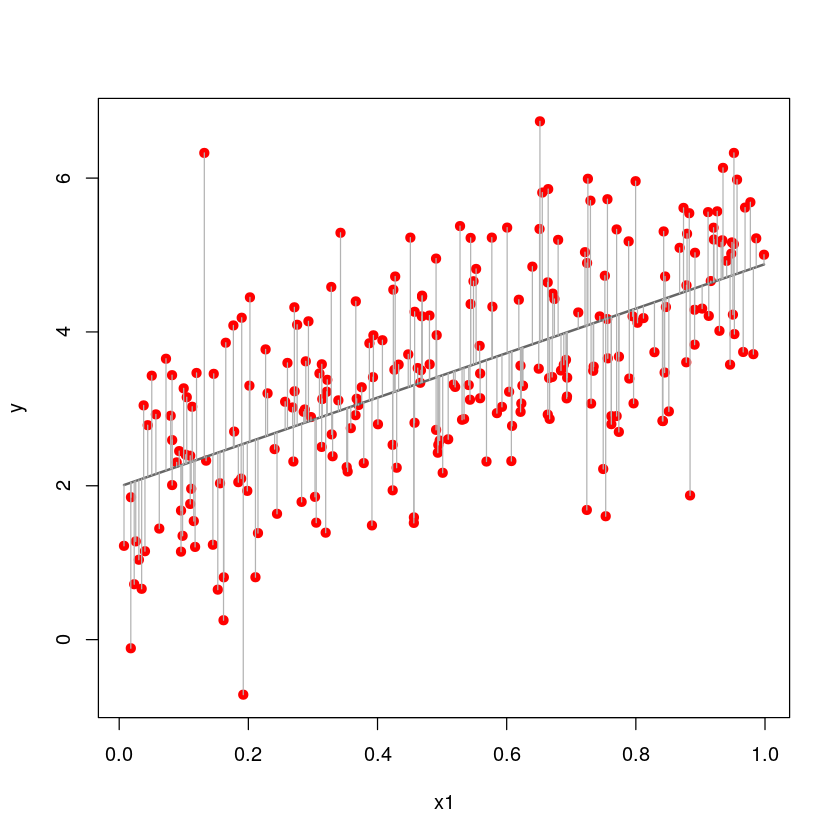

In [1]:
#Code 3.1 Basic linear model in R.
# Data
set.seed(1056)                                      # set seed to replicate example
nobs = 250                                           # number of obs in model
x1 <- runif(nobs)                                 # random uniform variable
alpha = 2                                              # intercept
beta = 3                                                # angular coefficient
xb <- alpha + beta* x1                        # linear predictor, xb
y <- rnorm(nobs, xb, sd=1)                 # create y as adjusted random normal variate


# Fit
summary(mod <- lm(y ~ x1))              # model of the synthetic data.

 

# Output

ypred <- predict(mod, type="response")                            # prediction from the model
plot(x1, y, pch=19,col="red")                                             # plot scatter
lines(x1,ypred,col='grey40',lwd=2)                                    # plot regression line
segments(x1, fitted(mod), x1, y, lwd=1, col="gray70")     # add the residuals

In [1]:
#Code 3.2 Ordinary least squares regression in Python without formula.
#==================================================
import numpy as np
import statsmodels.api as sm
from scipy.stats import uniform, norm


# Data
np.random.seed(1056)                                             # set seed to replicate example
nobs = 250                                                               # number of obs in model
x1 = uniform.rvs(size=nobs)                                   # random uniform variable
alpha = 2.0                                                               # intercept
beta = 3.0                                                                 # slope
xb = alpha + beta * x1                                             # linear predictor
y = norm.rvs(loc=xb, scale=1.0, size=nobs)           # create y as adjusted random normal variate


# Fit

unity_vec = np.full((nobs,),1, np.float)                   # unity vector
X = np.column_stack((unity_vec, x1))                   # build data matrix with intercept
results = sm.OLS(y, X).fit()


# Output
print(str(results.summary()))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.453
Method:                 Least Squares   F-statistic:                     207.0
Date:                Fri, 24 May 2019   Prob (F-statistic):           1.56e-34
Time:                        17:00:58   Log-Likelihood:                -339.11
No. Observations:                 250   AIC:                             682.2
Df Residuals:                     248   BIC:                             689.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0398      0.127     16.010      0.0